Customer Segmentation using Clustering
K-means clustering model

Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Data Collection and Analysis

In [2]:
customer_dataset = pd.read_csv("Customer segmentation.csv")

In [4]:
customer_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,"50,000"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,"50,001"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,"50,002"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,"50,003"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,"50,004"


In [5]:
customer_dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,"98,837"
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,"98,838"
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,"98,839"
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,"98,840"
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,50000


In [6]:
# shape of dataset

customer_dataset.shape

(48842, 15)

In [7]:
# information about dataset

customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# datatypes of columns dataset

customer_dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
# statistical measures of dataset
customer_dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Data Visulalization

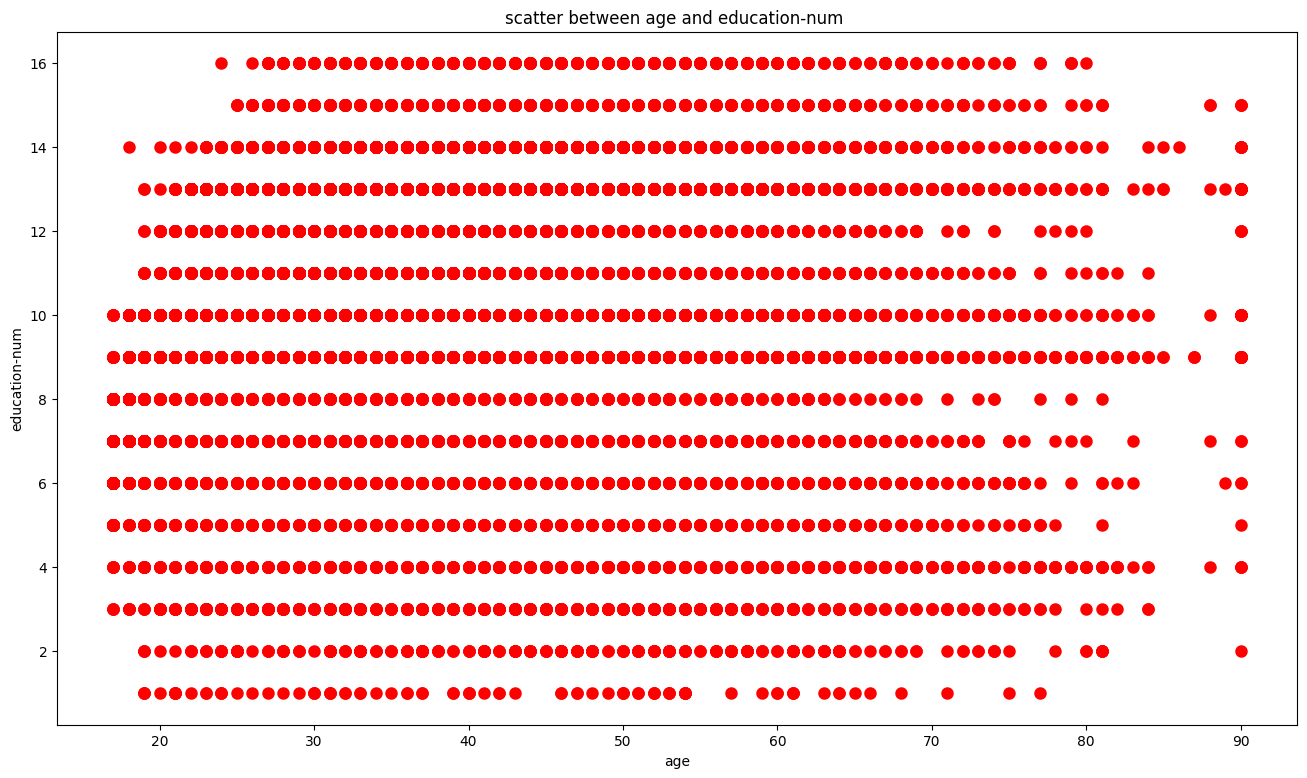

In [10]:
plt.figure(figsize = (16,9))
plt.scatter(x = customer_dataset.age, y = customer_dataset['education-num'], c = "red", linewidth = 3)
plt.title('scatter between age and education-num ')
plt.ylabel("education-num")
plt.xlabel("age")

plt.show()

<Axes: xlabel='count', ylabel='sex'>

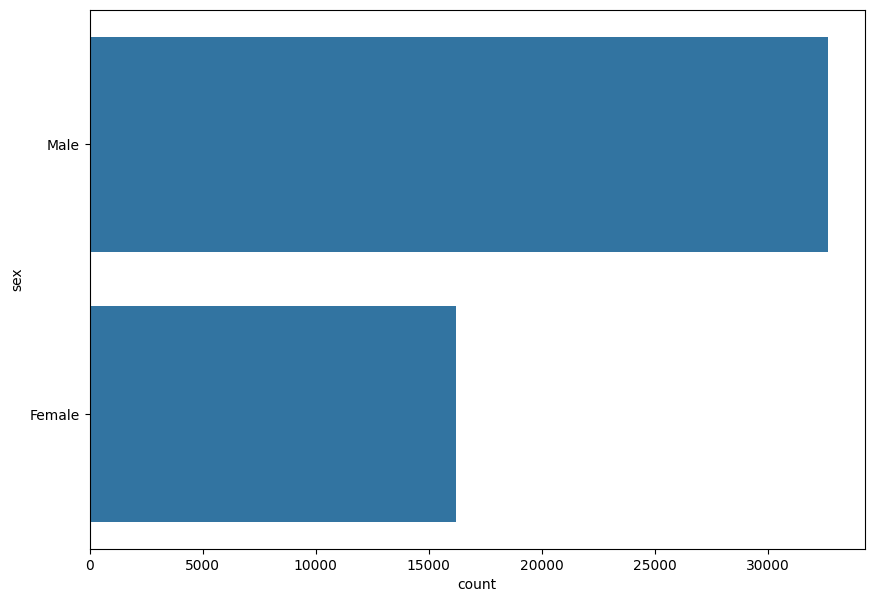

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(customer_dataset['sex'])

Choosing the Capital gain Column and Hours per week Columns

In [12]:
customer_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,"50,000"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,"50,001"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,"50,002"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,"50,003"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,"50,004"


In [13]:
customer_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
# using iloc for picking 10th and 12th columns
X = customer_dataset.iloc[:,[12,10]].values

In [15]:
print(X)

[[  40 2174]
 [  13    0]
 [  40    0]
 ...
 [  50    0]
 [  40 5455]
 [  60    0]]


choosing the number of clusters
WCSS : within Clusters Sum of Squares

In [16]:
# finding WCSS values for different number of clusters
wcss = []

for i in range(1,11):
    # 1 and 11 will be excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

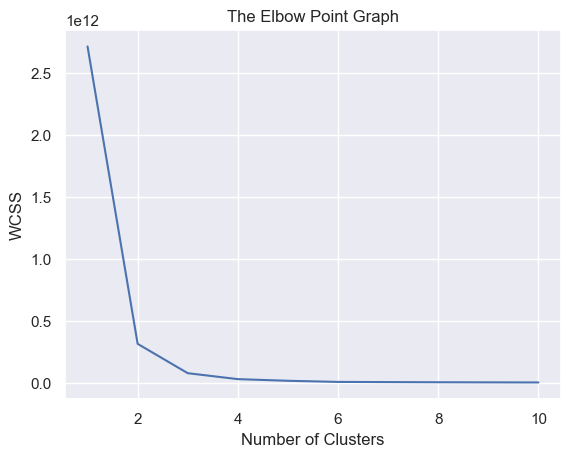

In [17]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Optimum number of clusters = 5

Training the K-Means Clustering model

In [18]:
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state =0)

# return a label for each data point based on their clusters

In [19]:
Y = kmeans.fit_predict(X)

print(Y)

C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 3 0]



Plotting data in graph

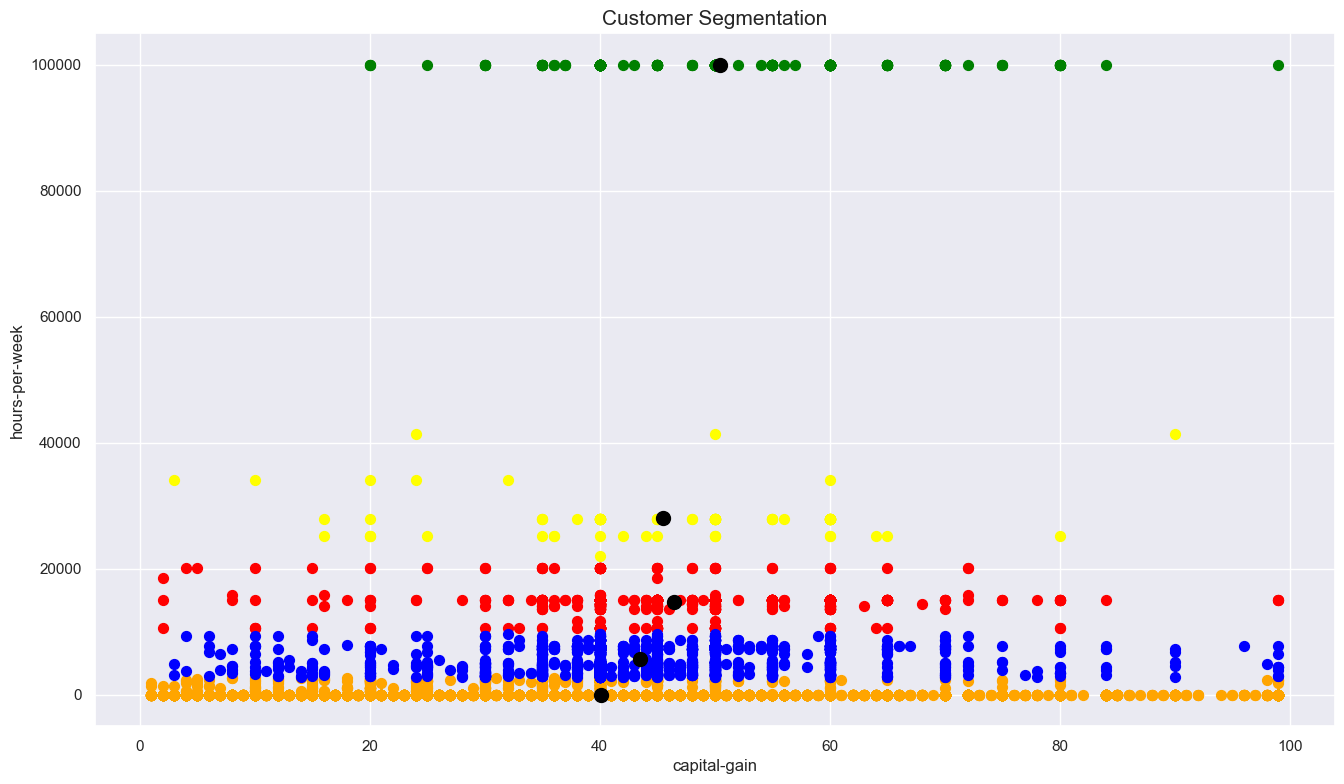

In [20]:

plt.figure(figsize = (16,9))
plt.title("Customer Segmentation", fontsize = 15)
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50, c = 'orange', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50, c = 'yellow', label = 'Cluster 4')

# plot the centroids
plt.xlabel("capital-gain")
plt.ylabel("hours-per-week")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =100, c='black', label = 'Centroids')

RANDOM FOREST ALGORITHM

In [32]:
# information about dataset

customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [40]:
dataset=pd.DataFrame(customer_dataset)


In [41]:
str(dataset)

'       age         workclass  fnlwgt  education  education-num  \\\n0       39         State-gov   77516  Bachelors             13   \n1       50  Self-emp-not-inc   83311  Bachelors             13   \n2       38           Private  215646    HS-grad              9   \n3       53           Private  234721       11th              7   \n4       28           Private  338409  Bachelors             13   \n...    ...               ...     ...        ...            ...   \n48837   39           Private  215419  Bachelors             13   \n48838   64               NaN  321403    HS-grad              9   \n48839   38           Private  374983  Bachelors             13   \n48840   44           Private   83891  Bachelors             13   \n48841   35      Self-emp-inc  182148  Bachelors             13   \n\n           marital-status         occupation    relationship  \\\n0           Never-married       Adm-clerical   Not-in-family   \n1      Married-civ-spouse    Exec-managerial         Husband 

In [42]:
# Defining the categorical and Numeric Input Data
dataset$age = as.numeric(dataset$age)
dataset$workclass = as.factor(dataset$workclass)
dataset$fnlwgt = as.numeric(dataset$fnlwgt)
dataset$education.num = as.factor(dataset$education.num)
dataset$marital.status = as.factor(dataset$marital.status)
dataset$occupation = as.factor(dataset$occupation)
dataset$relationship = as.factor(dataset$relationship)
dataset$race = as.factor(dataset$race)
dataset$sex = as.factor(dataset$sex)
dataset$capital.gain = as.numeric(dataset$capital.gain)
dataset$capital.loss = as.numeric(dataset$capital.loss)
dataset$hours.per.week = as.numeric(dataset$hours.per.week)
dataset$native.country = as.factor(dataset$native.country)


SyntaxError: invalid syntax (2878855179.py, line 2)

In [43]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
 
warnings.filterwarnings('ignore')

In [46]:
# Assuming df is your DataFrame
X = dataset.iloc[:,12].values  #features
y = dataset.iloc[:,10].values  # Target variable

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
 
 
label_encoder = LabelEncoder()
x_categorical = dataset.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = dataset.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [50]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9948107674976209
Mean Squared Error: 216.29652225543595
R-squared: 0.9999961049726207


ValueError: X has 1 features, but RandomForestRegressor is expecting 15 features as input.

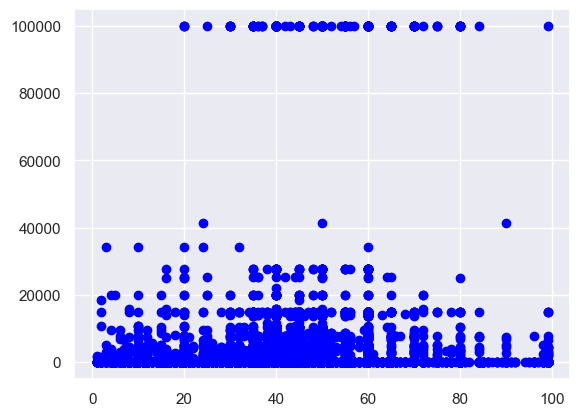

In [51]:

import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
   
plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points
   
plt.title("Random Forest Regression Results")
plt.xlabel('hours-per-week')
plt.ylabel('capital-gain')
plt.show()

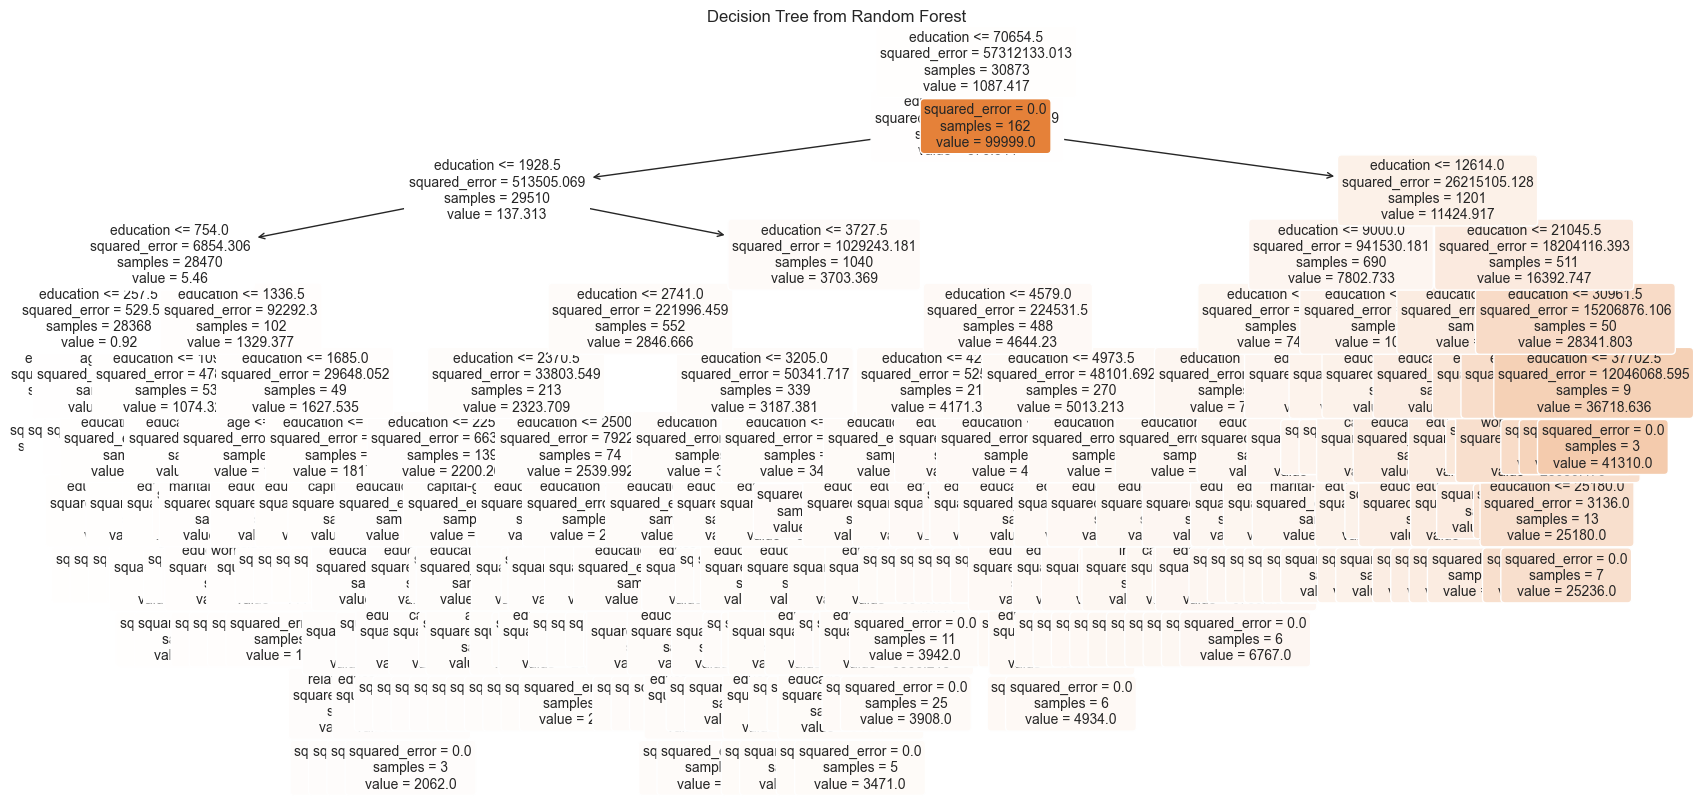

In [53]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('cust.csv')

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,50000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,50001
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,50002
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,50003
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,50004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,18,Private,132652,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,52703
2704,21,Private,34616,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,52704
2705,40,Private,218903,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,52705
2706,27,Local-gov,204098,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,50,United-States,52706


In [8]:
X = df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'], axis='columns')
y = df.income

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
len(X_train)

2166

In [11]:
len(X_test)

542

In [12]:
from sklearn.svm import SVC
model = SVC()

In [29]:
model.fit(X_train, y_train)

SVC()

In [30]:
model.score(X_test, y_test)

0.0

In [31]:
# model prediciton
model.predict([[3,5,1,2]])

C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but SVC is expecting 7 features as input.

In [32]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.0

In [33]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.0

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.score(X_test, y_test)

0.0